In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\ai_job_trends_dataset.csv")



In [3]:
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [4]:
print("\nDATASET SHAPE (Rows, Columns):")
print(df.shape)


DATASET SHAPE (Rows, Columns):
(30000, 13)


In [5]:
# STEP 5: Display all column names
print("\nCOLUMN NAMES:")
print(df.columns)



COLUMN NAMES:
Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')


In [6]:
# STEP 6: Check datatypes
print("\nDATA TYPES OF EACH COLUMN:")
print(df.dtypes)



DATA TYPES OF EACH COLUMN:
Job Title                       object
Industry                        object
Job Status                      object
AI Impact Level                 object
Median Salary (USD)            float64
Required Education              object
Experience Required (Years)      int64
Job Openings (2024)              int64
Projected Openings (2030)        int64
Remote Work Ratio (%)          float64
Automation Risk (%)            float64
Location                        object
Gender Diversity (%)           float64
dtype: object


In [7]:
print("\nMISSING VALUES IN EACH COLUMN:")
print(df.isnull().sum())




MISSING VALUES IN EACH COLUMN:
Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender Diversity (%)           0
dtype: int64


In [8]:
df_clean = df.dropna()


In [9]:
print(df_clean.shape)


(30000, 13)


In [10]:
df.describe()

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000


In [11]:

label = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':    # encode only categorical text
        df[col] = label.fit_transform(df[col])

print("\nCategorical variables encoded.")



Categorical variables encoded.


In [12]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    df = remove_outliers(col)

print("\nOutliers handled. Final shape:", df.shape)


Outliers handled. Final shape: (30000, 13)


In [13]:
print("\nFINAL CLEANED DATA PREVIEW:")
print(df.head())



FINAL CLEANED DATA PREVIEW:
   Job Title  Industry  Job Status  AI Impact Level  Median Salary (USD)  \
0        328         4           1                2             42109.76   
1        334         5           1                2            132298.57   
2        249         2           1                1            143279.19   
3        344         3           1                0             97576.13   
4         24         4           1                1             60956.63   

   Required Education  Experience Required (Years)  Job Openings (2024)  \
0                   3                            5                 1515   
1                   3                           15                 1243   
2                   1                            4                 3338   
3                   0                           15                 7173   
4                   3                           13                 5944   

   Projected Openings (2030)  Remote Work Ratio (%)  Automation

In [14]:
#EDA

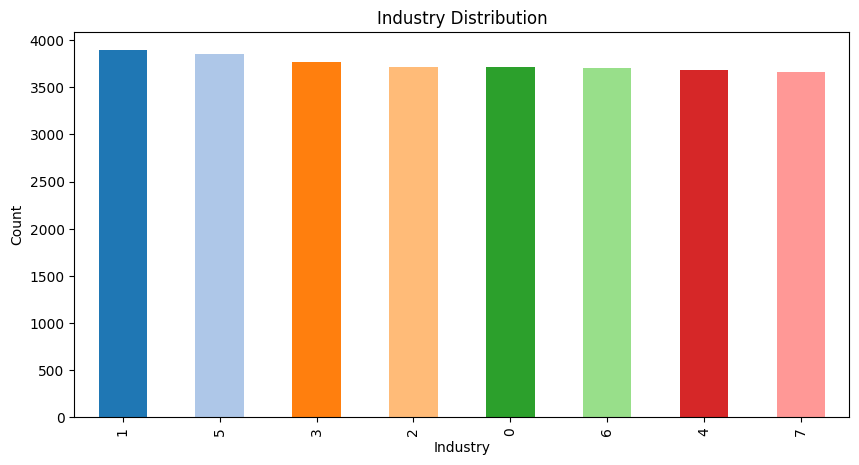

In [15]:
plt.figure(figsize=(10,5))
df['Industry'].value_counts().plot(kind='bar', color=plt.cm.tab20.colors)
plt.title("Industry Distribution")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.show()




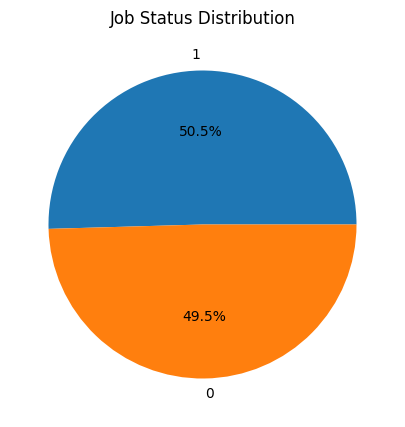

In [16]:
#Job Status Distribution (Full-time, Contract, Internship)
plt.figure(figsize=(8,5))
df['Job Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Job Status Distribution")
plt.ylabel("")
plt.show()


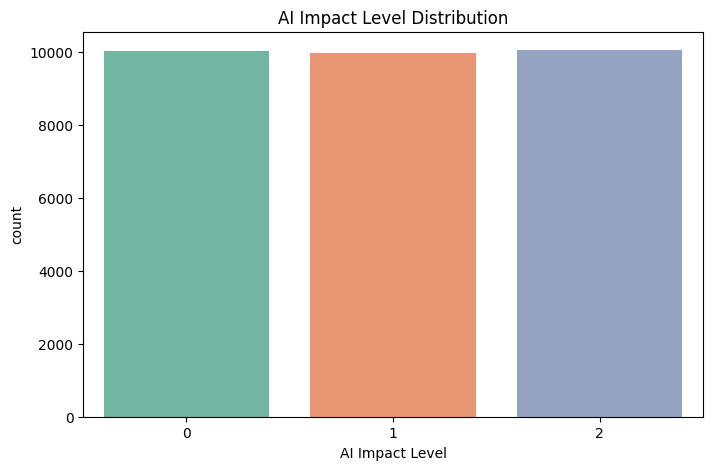

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AI Impact Level', hue='AI Impact Level', palette='Set2', legend=False)
plt.title("AI Impact Level Distribution")
plt.show()


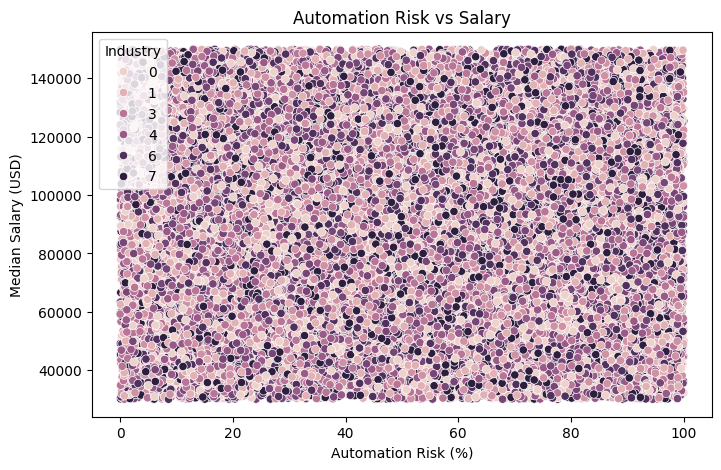

In [18]:
#Automation Risk (%) vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Automation Risk (%)', y='Median Salary (USD)', hue='Industry')
plt.title("Automation Risk vs Salary")
plt.show()


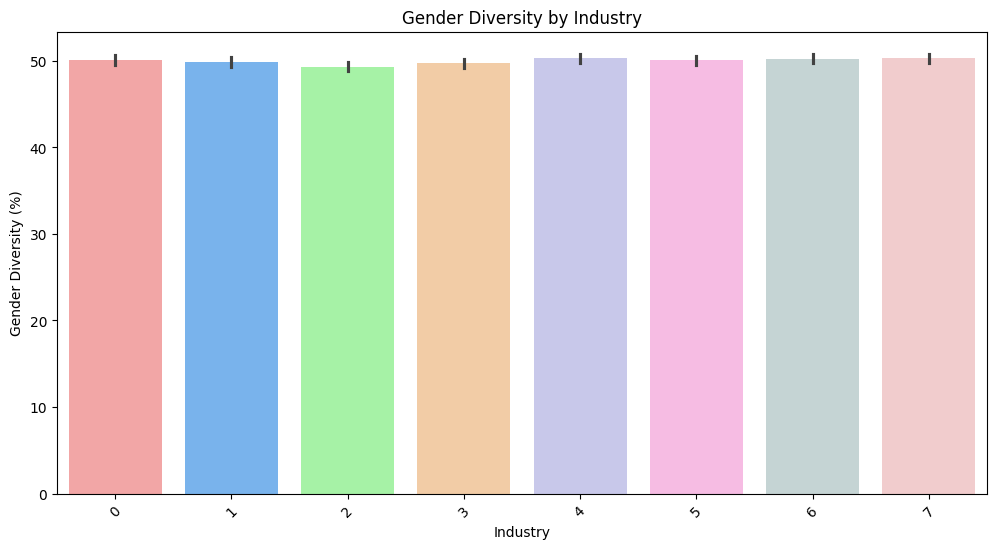

In [19]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#c2c2f0','#ffb3e6','#c2d6d6','#f7c6c7']  # 8 colors

plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='Industry',
    y='Gender Diversity (%)',
    hue='Industry',
    dodge=False,
    palette=colors,
    legend=False
)
plt.xticks(rotation=45)
plt.title("Gender Diversity by Industry")
plt.show()




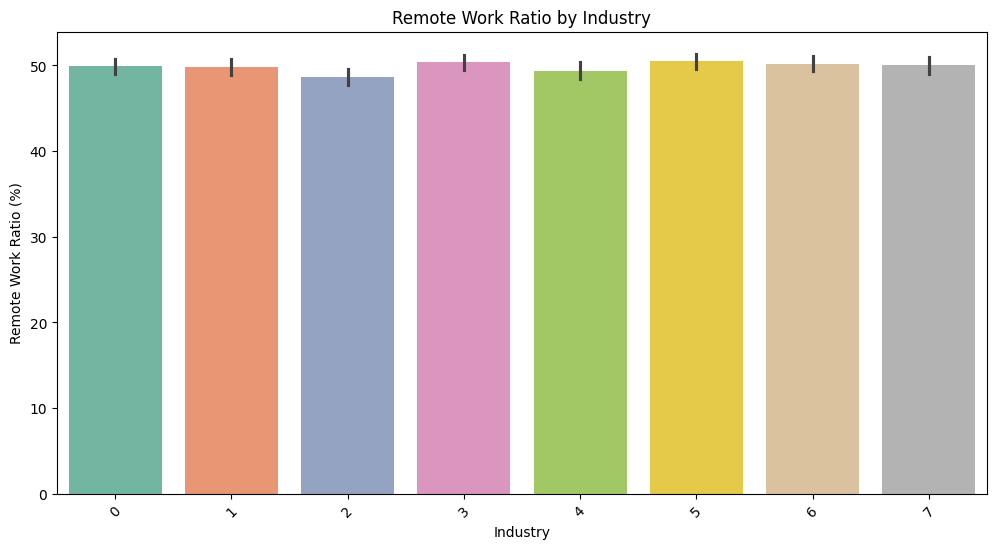

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='Industry',
    y='Remote Work Ratio (%)',
    hue='Industry',        # required for different colors
    dodge=False,
    palette='Set2',
    legend=False
)
plt.xticks(rotation=45)
plt.title("Remote Work Ratio by Industry")
plt.show()


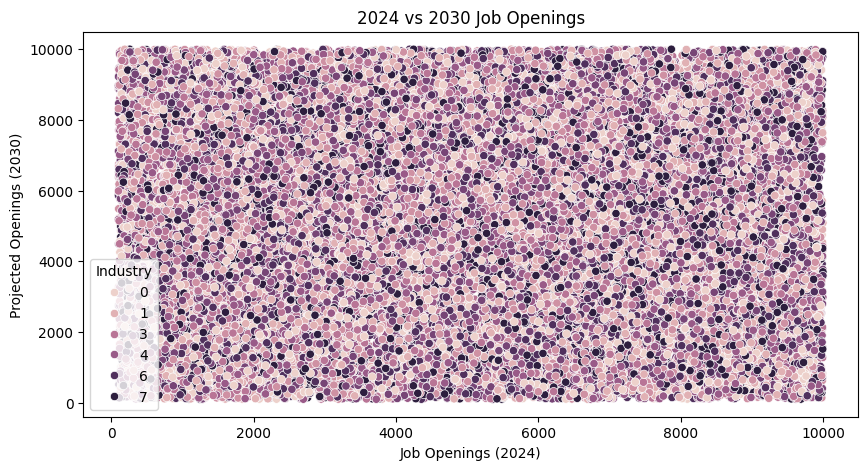

In [21]:
#Job Openings 2024 vs Projected Openings 2030
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Job Openings (2024)', y='Projected Openings (2030)', hue='Industry')
plt.title("2024 vs 2030 Job Openings")
plt.show()


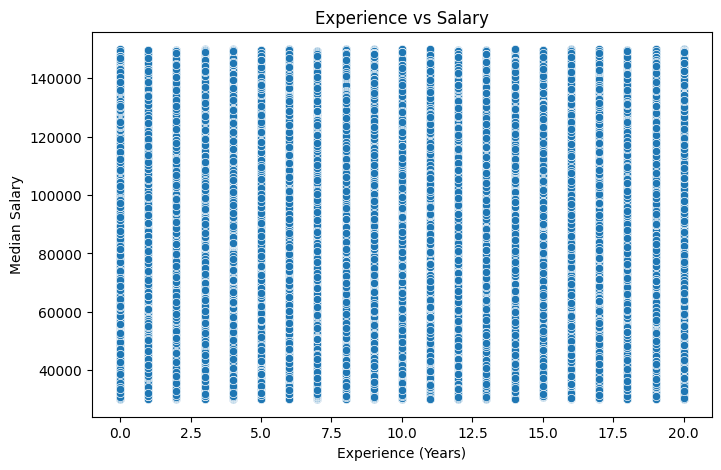

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Experience Required (Years)', y='Median Salary (USD)')
plt.title("Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Median Salary")
plt.show()


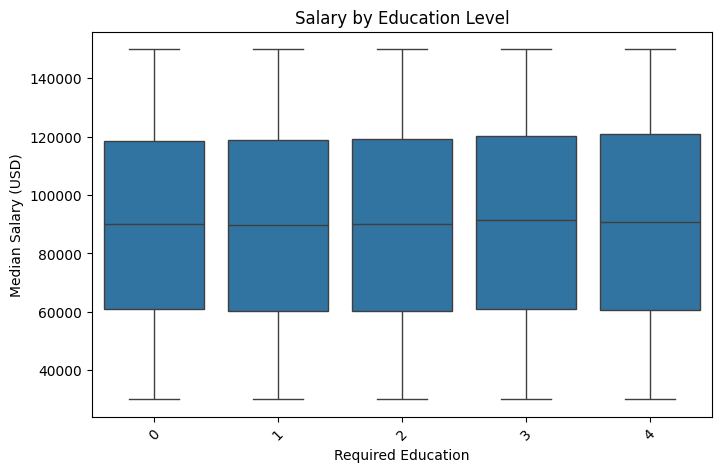

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Required Education', y='Median Salary (USD)')
plt.xticks(rotation=45)
plt.title("Salary by Education Level")
plt.show()


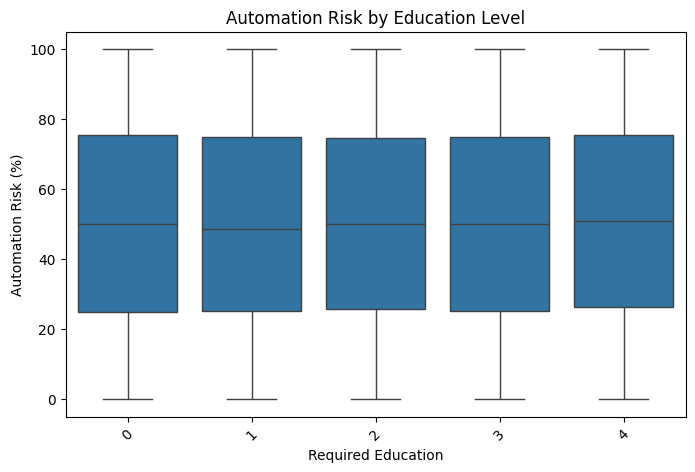

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Required Education', y='Automation Risk (%)')
plt.xticks(rotation=45)
plt.title("Automation Risk by Education Level")
plt.show()


In [25]:
#Automation Risk (%)
#So we can create automation-risk categories such as:
#Low risk → (0–30%)
#Medium risk → (31–60%)
#High risk → (61–100%)


In [26]:
def categorize_risk(x):
    if x <= 30:
        return "Low Risk"
    elif x <= 60:
        return "Medium Risk"
    else:
        return "High Risk"

df["Automation Risk Category"] = df["Automation Risk (%)"].apply(categorize_risk)


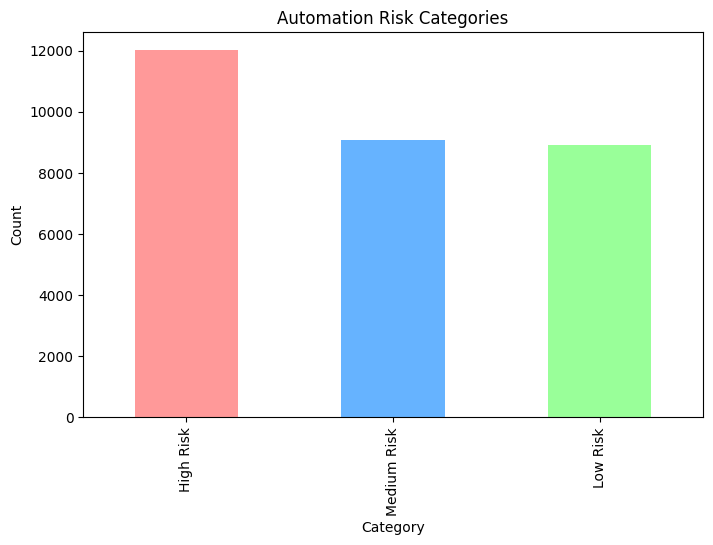

In [27]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # 4 categories
plt.figure(figsize=(8,5))
df['Automation Risk Category'].value_counts().plot(
    kind='bar',
    color=colors
)
plt.title("Automation Risk Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


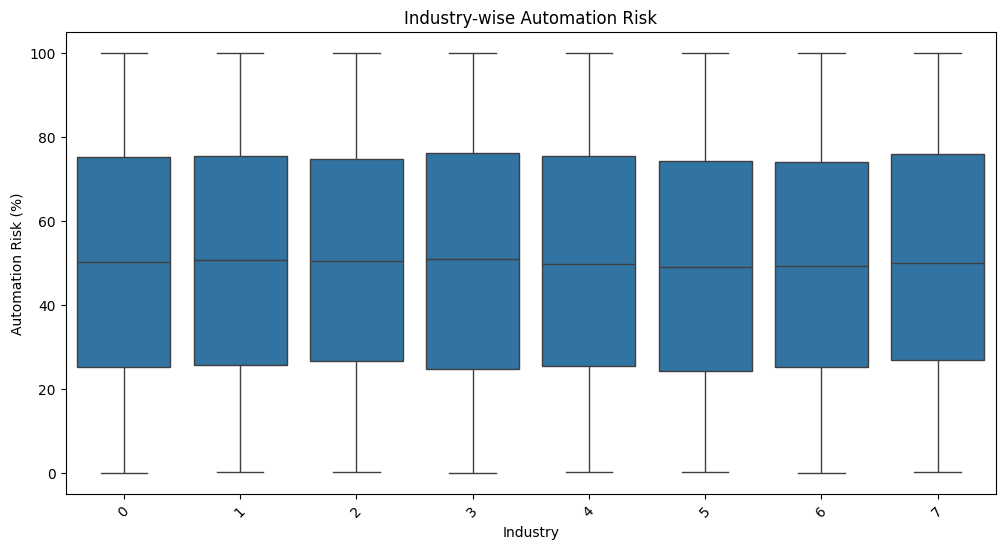

In [28]:
#Automation Risk vs Industry
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Industry', y='Automation Risk (%)')
plt.xticks(rotation=45)
plt.title("Industry-wise Automation Risk")
plt.show()


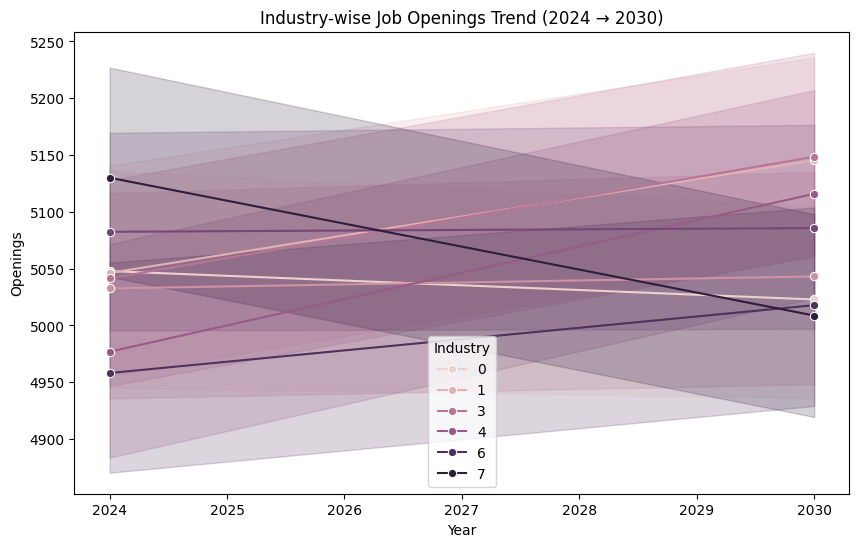

In [29]:
df_trend = df[["Industry", "Job Openings (2024)", "Projected Openings (2030)"]]

df_trend = df_trend.melt(id_vars="Industry",
                         var_name="Year",
                         value_name="Openings")

df_trend["Year"] = df_trend["Year"].map({
    "Job Openings (2024)": 2024,
    "Projected Openings (2030)": 2030
})   # no warning

plt.figure(figsize=(10,6))
sns.lineplot(data=df_trend, x="Year", y="Openings", hue="Industry", marker="o")
plt.title("Industry-wise Job Openings Trend (2024 → 2030)")
plt.show()


In [30]:
#STEP 4 FEATURE ENGINEERING

In [31]:
#Create Job Growth Rate
df["Job Growth Rate (%)"] = (
    (df["Projected Openings (2030)"] - df["Job Openings (2024)"]) 
    / df["Job Openings (2024)"] * 100
)


In [32]:
#Create Automation Risk Categories
def categorize_risk(x):
    if x <= 30:
        return "Low Risk"
    elif x <= 60:
        return "Medium Risk"
    else:
        return "High Risk"

df["Automation Risk Category"] = df["Automation Risk (%)"].apply(categorize_risk)


In [33]:
#Encode Education Levels
#We convert education to numeric ranking.
#High School = 1
#Diploma = 2
#Bachelor = 3
#Master = 4
#PhD = 5
education_map = {
    "High School": 1,
    "Diploma": 2,
    "Bachelor's": 3,
    "Master's": 4,
    "PhD": 5
}

df["Education Level Code"] = df["Required Education"].map(education_map)


In [34]:
#Encode AI Impact Level
impact_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Very High": 4
}

df["AI Impact Code"] = df["AI Impact Level"].map(impact_map)


In [35]:
#Create Feature: Work Flexibility Category
def remote_category(x):
    if x < 20:
        return "Office-heavy"
    elif x < 60:
        return "Hybrid"
    else:
        return "Remote-friendly"

df["Work Flexibility"] = df["Remote Work Ratio (%)"].apply(remote_category)


In [36]:
#Create Salary Category
def salary_group(x):
    if x < 50000:
        return "Low Salary"
    elif x < 100000:
        return "Medium Salary"
    else:
        return "High Salary"

df["Salary Category"] = df["Median Salary (USD)"].apply(salary_group)


In [37]:
#Encode Categorical Columns (For ML Models)
from sklearn.preprocessing import LabelEncoder
label_cols = ["Job Title", "Industry", "Job Status", 
              "Required Education", "Location", 
              "Automation Risk Category", "Work Flexibility", "Salary Category"]
le = LabelEncoder()
for col in label_cols:
    df[col + "_Code"] = le.fit_transform(df[col])


In [38]:
df.head(10)


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),...,Work Flexibility,Salary Category,Job Title_Code,Industry_Code,Job Status_Code,Required Education_Code,Location_Code,Automation Risk Category_Code,Work Flexibility_Code,Salary Category_Code
0,328,4,1,2,42109.76,3,5,1515,6342,55.96,...,Hybrid,Low Salary,328,4,1,3,6,1,0,1
1,334,5,1,2,132298.57,3,15,1243,6205,16.81,...,Office-heavy,High Salary,334,5,1,3,7,0,1,0
2,249,2,1,1,143279.19,1,4,3338,1154,91.82,...,Remote-friendly,High Salary,249,2,1,1,2,0,2,0
3,344,3,1,0,97576.13,0,15,7173,4060,1.89,...,Office-heavy,Medium Salary,344,3,1,0,0,0,1,2
4,24,4,1,1,60956.63,3,13,5944,7396,53.76,...,Hybrid,Medium Salary,24,4,1,3,4,2,0,2
5,344,0,0,1,39123.32,3,20,6985,7832,77.50,...,Remote-friendly,Low Salary,344,0,0,3,7,1,2,1
6,571,5,0,0,147150.03,2,7,9738,4360,30.51,...,Hybrid,High Salary,571,5,0,2,6,1,0,0
7,154,1,0,0,64245.48,0,0,1393,8206,9.74,...,Office-heavy,Medium Salary,154,1,0,0,2,1,1,2
8,192,0,1,0,72488.15,2,12,7729,4452,38.77,...,Hybrid,Medium Salary,192,0,1,2,0,0,0,2
9,628,5,0,2,95840.30,0,16,1127,2375,4.29,...,Office-heavy,Medium Salary,628,5,0,0,3,0,1,2


In [39]:
print(df.columns)

Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)',
       'Automation Risk Category', 'Job Growth Rate (%)',
       'Education Level Code', 'AI Impact Code', 'Work Flexibility',
       'Salary Category', 'Job Title_Code', 'Industry_Code', 'Job Status_Code',
       'Required Education_Code', 'Location_Code',
       'Automation Risk Category_Code', 'Work Flexibility_Code',
       'Salary Category_Code'],
      dtype='object')


In [40]:
df[['Job Growth Rate (%)',
    'Automation Risk Category',
    'Education Level Code',
    'AI Impact Code',
    'Work Flexibility',
    'Salary Category']].head()


,Job Growth Rate (%),Automation Risk Category,Education Level Code,AI Impact Code,Work Flexibility,Salary Category
0,318.613861,Low Risk,NaN,NaN,Hybrid,Low Salary
1,399.195495,High Risk,NaN,NaN,Office-heavy,High Salary
2,-65.428400,High Risk,NaN,NaN,Remote-friendly,High Salary
3,-43.398857,High Risk,NaN,NaN,Office-heavy,Medium Salary
4,24.427995,Medium Risk,NaN,NaN,Hybrid,Medium Salary


In [41]:
#STEP 5 – MODEL BUILDING (With Unique Features)
#Idea #1: Predict AI Impact Level (likely classification)
 #5: Predict Median Salary (USD) or Automation Risk (%) (likely regression)

In [42]:
# STEP 5 – CLASSIFICATION MODELS


In [43]:
target = "Automation Risk Category"


In [44]:
# 2. Prepare X and y
X = df.drop(columns=[target])
y = df[target]


In [45]:
print(df.columns.tolist())


['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Median Salary (USD)', 'Required Education', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Location', 'Gender Diversity (%)', 'Automation Risk Category', 'Job Growth Rate (%)', 'Education Level Code', 'AI Impact Code', 'Work Flexibility', 'Salary Category', 'Job Title_Code', 'Industry_Code', 'Job Status_Code', 'Required Education_Code', 'Location_Code', 'Automation Risk Category_Code', 'Work Flexibility_Code', 'Salary Category_Code']


In [46]:
X = X.select_dtypes(include=['int64', 'float64'])
print(X.head())


   Job Title  Industry  Job Status  AI Impact Level  Median Salary (USD)  \
0        328         4           1                2             42109.76   
1        334         5           1                2            132298.57   
2        249         2           1                1            143279.19   
3        344         3           1                0             97576.13   
4         24         4           1                1             60956.63   

   Required Education  Experience Required (Years)  Job Openings (2024)  \
0                   3                            5                 1515   
1                   3                           15                 1243   
2                   1                            4                 3338   
3                   0                           15                 7173   
4                   3                           13                 5944   

   Projected Openings (2030)  Remote Work Ratio (%)  ...  \
0                       6342    

In [47]:
# Drop columns that have 100% missing values
#because imputer change the size of droping the non missing columns
X = X.drop(columns=["Education Level Code", "AI Impact Code"], errors="ignore")



In [48]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)


In [49]:
# 3. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
# 4. Scaling only for KNN & SVM
# Scale only the numerical features (for KNN & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert scaled arrays back to DataFrame for better readability
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)
# Display first few rows of scaled training data
X_train_scaled_df.head()


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),...,Gender Diversity (%),Job Growth Rate (%),Job Title_Code,Industry_Code,Job Status_Code,Required Education_Code,Location_Code,Automation Risk Category_Code,Work Flexibility_Code,Salary Category_Code
21753,0.876215,-0.646157,-1.010303,-0.002955,-1.113701,-0.700899,0.486737,-0.971417,0.679187,-0.522071,...,-1.389365,0.135696,0.876215,-0.646157,-1.010303,-0.700899,0.222475,1.313223,-1.120226,1.088481
251,0.075217,-1.520597,-1.010303,-0.002955,0.148115,-1.409654,0.816291,-0.877986,0.223872,0.089690,...,-1.555356,-0.019801,0.075217,-1.520597,-1.010303,-1.409654,0.659630,-1.087550,-1.120226,1.088481
22941,0.248406,0.665504,-1.010303,-0.002955,-1.332998,-0.700899,1.475399,0.859422,-0.796229,-0.611286,...,0.892287,-0.367870,0.248406,0.665504,-1.010303,-0.700899,-0.214679,0.112836,-1.120226,-0.004875
618,-0.606713,-0.208937,0.989802,-1.225720,0.593290,-0.700899,0.651514,-1.377687,1.191678,-0.011926,...,1.413973,0.986895,-0.606713,-0.208937,0.989802,-0.700899,0.222475,0.112836,-1.120226,-1.098230
17090,1.677213,-1.520597,-1.010303,-1.225720,0.738674,0.007855,-0.337147,0.562680,-1.051080,-1.369442,...,0.218491,-0.379306,1.677213,-1.520597,-1.010303,0.007855,1.096784,-1.087550,0.001496,-1.098230


In [51]:
# 5. Define models 
models = {
    "Logistic Regression": LogisticRegression(max_iter=400),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

In [52]:
accuracy_results = {}

for name, model in models.items():

    # Models needing scaling
    if name in ["KNN", "SVM", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc

    # Print results
    print("\n===================================")
    print(name)
    print("Accuracy:", round(acc, 4))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # No undefined-metric warnings
    print("\nClassification Report:\n",
          classification_report(y_test, y_pred, zero_division=0))


# ============================
# 4. Final Model Comparison
# ============================
print("\n====== FINAL MODEL ACCURACY COMPARISON ======")
for model, acc in accuracy_results.items():
    print(f"{model}: {round(acc, 4)}")


Logistic Regression
Accuracy: 1.0

Confusion Matrix:
 [[2445    0    0]
 [   0 1790    0]
 [   0    0 1765]]

Classification Report:
               precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00      2445
    Low Risk       1.00      1.00      1.00      1790
 Medium Risk       1.00      1.00      1.00      1765

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000


Decision Tree
Accuracy: 1.0

Confusion Matrix:
 [[2445    0    0]
 [   0 1790    0]
 [   0    0 1765]]

Classification Report:
               precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00      2445
    Low Risk       1.00      1.00      1.00      1790
 Medium Risk       1.00      1.00      1.00      1765

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      

## UNSEEN DATASET


In [53]:
import os
print(os.getcwd())


C:\Users\LENOVO


In [54]:
selected_features = [
    'Job Growth Rate (%)',
    'Automation Risk Category_Code',
    'Required Education_Code',
    'AI Impact Level',
    'Work Flexibility_Code',
    'Salary Category_Code'
]




In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scale only selected features
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])



In [56]:
import pandas as pd

unseen_df = pd.DataFrame({
    'Job Growth Rate (%)': [5, -2, 12],
    'Automation Risk Category_Code': [2, 0, 1],   # High, Low, Medium
    'Required Education_Code': [3, 1, 4],         # Bachelors, High School, Masters
    'AI Impact Level': [3, 1, 4],                 # High, Low, Very High
    'Work Flexibility_Code': [2, 0, 1],           # Remote, Onsite, Hybrid
    'Salary Category_Code': [3, 1, 4]             # Medium, Low, High
})


In [57]:
unseen_scaled = scaler.transform(unseen_df[selected_features])


In [60]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [61]:
predictions = svm_model.predict(unseen_scaled)
print(predictions)


['Medium Risk' 'High Risk' 'Low Risk']
